In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
filePath = "data/merged_vessel_hurricane.csv"
df = pd.read_csv(filePath)

In [4]:
df.head(5)

,Unnamed: 0_x,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,...,50-knot Wind Radii NE,50-knot Wind Radii SE,50-knot Wind Radii SW,50-knot Wind Radii NW,64-knot Wind Radii NE,64-knot Wind Radii SE,64-knot Wind Radii SW,64-knot Wind Radii NW,hurricane_datetime,VesselPath
0,5687902,0,2023-09-26 18:00:00,43.64547,-70.24832,0.0,211.5,233.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-26 18:00:00,stopped
1,948,0,2023-09-27 00:00:00,43.64547,-70.24831,0.0,261.9,233.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-27 00:00:00,stopped
2,1909511,0,2023-09-27 06:00:00,43.64546,-70.24833,0.0,311.0,233.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-27 06:00:00,stopped
3,3797682,0,2023-09-28 12:00:00,43.49559,-70.28089,10.3,231.1,234.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-28 12:00:00,stayed on course
4,3797682,0,2023-09-28 12:00:00,43.49559,-70.28089,10.3,231.1,234.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-28 12:00:00,stayed on course


In [5]:
df.shape

(133199, 44)

In [6]:
print(df.columns)
print(df.dtypes)

Index(['Unnamed: 0_x', 'MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG',
       'Heading', 'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status',
       'Length', 'Width', 'Draft', 'Cargo', 'TransceiverClass', 'impacted',
       'Unnamed: 0_y', 'Name', 'Num Entries', 'Year', 'Time',
       'Record Identifier', 'Status of System', 'Latitude', 'Longitude',
       'Maximum Sustained Wind', 'Minimum Pressure', '34-knot Wind Radii NE',
       '34-knot Wind Radii SE', '34-knot Wind Radii SW',
       '34-knot Wind Radii NW', '50-knot Wind Radii NE',
       '50-knot Wind Radii SE', '50-knot Wind Radii SW',
       '50-knot Wind Radii NW', '64-knot Wind Radii NE',
       '64-knot Wind Radii SE', '64-knot Wind Radii SW',
       '64-knot Wind Radii NW', 'hurricane_datetime', 'VesselPath'],
      dtype='object')
Unnamed: 0_x                int64
MMSI                        int64
BaseDateTime               object
LAT                       float64
LON                       float64
SOG            

In [7]:
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'])
df = df.sort_values(by=['MMSI', 'BaseDateTime']).reset_index(drop=True)  # Sort the data by vessel and timestamp
labels = []
cog_diffs = []

for i in range(1, len(df)):
    curr_vessel = df.loc[i, 'MMSI']
    prev_vessel = df.loc[i - 1, 'MMSI']
    time_diff = df.loc[i, 'BaseDateTime'] - df.loc[i - 1, 'BaseDateTime']

    if (curr_vessel == prev_vessel) and (time_diff <= pd.Timedelta('1D')):
        prev_cog = df.loc[i - 1, 'COG']
        curr_cog = df.loc[i, 'COG']
        cog_diff = abs(curr_cog - prev_cog)
        curr_sog = df.loc[i, 'SOG']

        cog_diffs.append(cog_diff)
        if curr_sog == 0:
            labels.append('stopped')
        elif abs(cog_diff - 180) <= 10:
            labels.append('turned around')
        elif cog_diff > 15:
            labels.append('veered off course')
        else:
            labels.append('stayed on course')
    else:
        labels.append('stayed on course')

if df.loc[0, 'SOG'] == 0:
    labels.insert(0, 'stopped')
else:
    labels.insert(0, 'stayed on course')

df['VesselPath'] = labels
df.head(25)

,Unnamed: 0_x,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,...,50-knot Wind Radii NE,50-knot Wind Radii SE,50-knot Wind Radii SW,50-knot Wind Radii NW,64-knot Wind Radii NE,64-knot Wind Radii SE,64-knot Wind Radii SW,64-knot Wind Radii NW,hurricane_datetime,VesselPath
0,5687902,0,2023-09-26 18:00:00,43.64547,-70.24832,0.0,211.5,233.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-26 18:00:00,stopped
1,948,0,2023-09-27 00:00:00,43.64547,-70.24831,0.0,261.9,233.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-27 00:00:00,stopped
2,1909511,0,2023-09-27 06:00:00,43.64546,-70.24833,0.0,311.0,233.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-27 06:00:00,stopped
3,3797682,0,2023-09-28 12:00:00,43.49559,-70.28089,10.3,231.1,234.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-28 12:00:00,stayed on course
4,3797682,0,2023-09-28 12:00:00,43.49559,-70.28089,10.3,231.1,234.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-28 12:00:00,stayed on course
5,4131,0,2023-09-29 00:00:00,43.64546,-70.24830,0.0,195.2,233.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-29 00:00:00,stopped
6,4131,0,2023-09-29 00:00:00,43.64546,-70.24830,0.0,195.2,233.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-29 00:00:00,stopped
7,3923462,0,2023-09-29 12:00:00,43.64547,-70.24834,0.0,357.0,233.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-29 12:00:00,stopped
8,3923462,0,2023-09-29 12:00:00,43.64547,-70.24834,0.0,357.0,233.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-29 12:00:00,stopped
9,721,0,2023-09-30 00:00:00,43.64546,-70.24830,0.0,33.3,233.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-30 00:00:00,stopped


In [8]:
value_counts = df['VesselPath'].value_counts()
value_counts

VesselPath
stayed on course     72344
stopped              53781
veered off course     6627
turned around          447
Name: count, dtype: int64

In [9]:
id_counts = df['MMSI'].value_counts()

count_one = 0
count_ten = 0
count_more_than_ten = 0

for count in id_counts:
    if count == 1:
        count_one += 1
    elif count < 10:
        count_ten += 1
    else:
        count_more_than_ten += 1


/var/folders/bf/zbss70kn2fq_0xbjk976nwx80000gn/T/ipykernel_7669/77525370.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=data, palette='Blues_d')


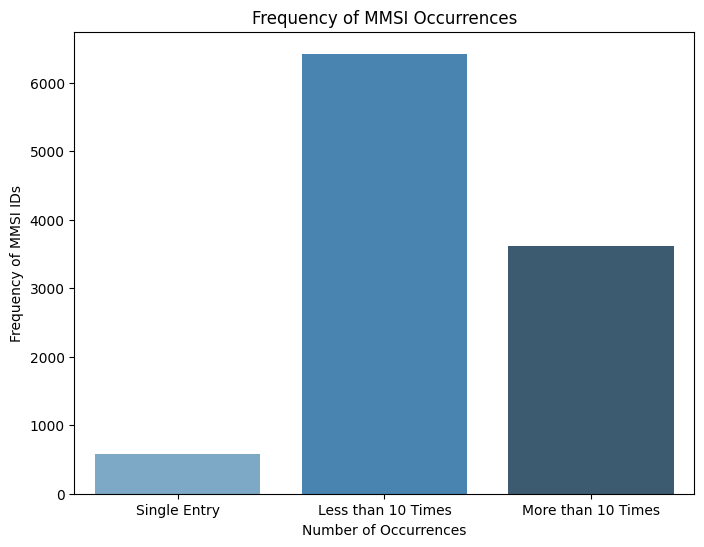

In [10]:
data = pd.DataFrame({
    'Category': ['Single Entry', 'Less than 10 Times', 'More than 10 Times'],
    'Count': [count_one, count_ten, count_more_than_ten]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=data, palette='Blues_d')

plt.title('Frequency of MMSI Occurrences')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency of MMSI IDs')
plt.show()

In [11]:
print("Single Entry:", count_one)
print("Less than 10 Entrys:", count_ten)
print("Greater than 10 Entrys:", count_more_than_ten)

Single Entry: 573
Less than 10 Entrys: 6426
Greater than 10 Entrys: 3615


In [12]:
# Logic
# If the vessel is not impacted by a hurricane and the vessel veers off course, it is likely due to a change in destination
# If the vessel is impacted by a hurricane and veers off course, it is likely due to the hurricane

hurricane_freq = 0 # Number of times a vessel was impacted by a hurricane and drastically changed course
no_hurricane_freq = 0 # Number of times a vessel changed course but was not impacted by a hurricane
stayed_on_course_freq = 0 # Number of times a vessel stayed on course

for i in range(len(df)):
    if df.loc[i, 'VesselPath'] != 'stayed on course' and df.loc[i, 'impacted'] == True:
        hurricane_freq += 1
    elif df.loc[i, 'VesselPath'] != 'stayed on course':
        no_hurricane_freq += 1
    else:
        stayed_on_course_freq += 1


In [13]:
percent1 = (hurricane_freq / len(df)) * 100
percent2 = (no_hurricane_freq / len(df)) * 100
percent3 = (stayed_on_course_freq / len(df)) * 100

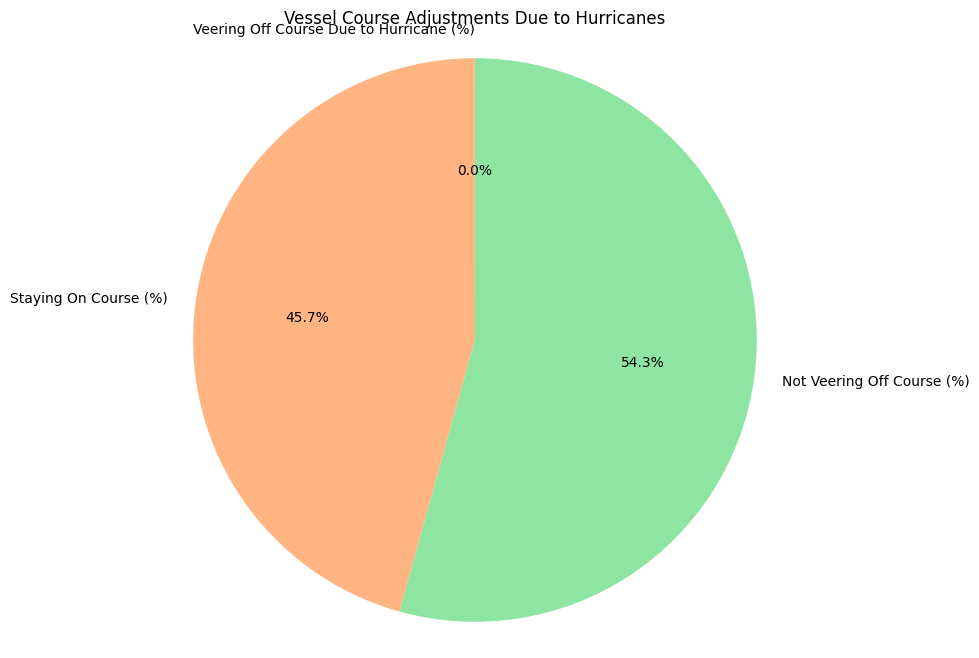

In [14]:
labels = [
    'Veering Off Course Due to Hurricane (%)',
    'Staying On Course (%)',
    'Not Veering Off Course (%)'
]
sizes = [percent1, percent2, percent3]
colors = sns.color_palette("pastel")[0:3]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Vessel Course Adjustments Due to Hurricanes')
plt.show()

In [15]:
print(percent1)
print(percent2)
print(percent3)

0.013513614967079332
45.673766319566965
54.31272006546596


### **Notes:**
- No requests were made for Trello access.
- Confirmed that the thresholds I set are appropriate.
- But we may need to consider whether a vessel is at a port, as they tend to change direction frequently in the vicinity of a port. 

Questions anwsered
- How often do vessels drastically change their course? In response to hurricanes and without?
- Frequency of vessels in the dataset

- vessel lengths
- not enough vessels being impacted by hurricanes

In [16]:
(df["Cargo"].isna().sum()) / len(df)
df["VesselType"].value_counts()

VesselType
31.0     46142
60.0     16286
37.0     14692
70.0      9922
90.0      9179
30.0      7227
52.0      5816
57.0      4373
80.0      4001
36.0      3399
0.0       2583
50.0      1599
99.0       932
33.0       795
71.0       683
40.0       626
69.0       497
51.0       496
79.0       492
89.0       329
32.0       276
35.0       266
65.0       238
74.0       232
56.0       213
55.0       211
20.0       156
49.0       117
1.0         77
38.0        72
53.0        72
39.0        72
68.0        66
81.0        66
73.0        66
34.0        61
3.0         56
82.0        53
95.0        50
9.0         41
84.0        40
72.0        33
29.0        32
54.0        27
83.0        19
66.0        15
75.0        14
78.0        12
59.0        11
7.0         10
23.0        10
97.0         7
76.0         7
6.0          6
16.0         4
24.0         4
136.0        4
200.0        3
202.0        2
58.0         1
Name: count, dtype: int64

In [17]:
res = (df[""].sum()) / len(df)
res

10.411594681641754

In [18]:
filtered_df = df[(df['Length'] > 200) & ((df['VesselType'].between(70, 89)) | (df['VesselType'].isin([1003, 1004, 1016, 1017])))]

In [20]:
filtered_df["Length"].mean()

269.57803867403317

In [22]:
filtered_df.shape

(7240, 44)